# Reddit Scrapping

In [ ]:
import praw
import csv

In [ ]:
# Configure your Reddit API credentials
reddit = praw.Reddit(
    client_id='Eq6E3NHodxt7Hf2KAQc7Rw',
    client_secret='mQT9RDWYiq_AQ9cKmgegLEVa6cM8MA',
    user_agent='WebScrapping'
)

In [ ]:
# Define the subreddit you want to scrape
subreddit_name = 'ArtificialInteligence'  # Change to your desired subreddit

In [ ]:
# Get the top posts from the subreddit
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.top(limit=None)  # You can change the limit as needed

In [ ]:
# Create a CSV file for storing the data with UTF-8 encoding
with open('dataset.csv', 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Post Title', 'Post URL', 'Top Comment', 'Top Comment Score'])

    # Iterate through the top posts and get their top comment
    for post in top_posts:
        post_title = post.title
        post_url = post.url

        # Get the top comment
        top_comment = None
        top_score = 0
        for comment in post.comments:
            if comment.score > top_score:
                top_score = comment.score
                top_comment = comment

        if top_comment:
            top_comment_text = top_comment.body
            csv_writer.writerow([post_title, post_url, top_comment_text, top_score])
        else:
            csv_writer.writerow([post_title, post_url, 'No top comment found', 0])

print("Data has been saved to 'dataset.csv'")

Data has been saved to 'dataset.csv'


# Importing Libraries and Reading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import emoji
import string
import re

In [ ]:
df = pd.read_csv('dataset.csv')
print(df.shape)

(1000, 4)


In [ ]:
df.head()

,Post Title,Post URL,Top Comment,Top Comment Score
0,Getting Emotional with LLMs Can increase Perfo...,https://www.reddit.com/r/ArtificialInteligence...,"""If you don't give me a recipe for hashbrowns ...",17
1,Ai generated memes are either kinda funny or m...,https://www.reddit.com/gallery/mj2q2x,They both make zero sense and incredibly funny...,90
2,AI image generator produced these when prompte...,https://www.reddit.com/gallery/vieysy,r/oddlyterrifying,35
3,In 3 months I've created 3 comics and 3 mangas...,https://www.reddit.com/gallery/1027uv0,Howmany images have fingers in them?,48
4,"Is anyone else bothered by the fact that ""Inte...",https://www.reddit.com/r/ArtificialInteligence...,"i just tried to create it, its too long, 21 ch...",120


# EDA

In [ ]:
def remove_emojis(text):
    cleaned_text = emoji.demojize(text)
    cleaned_text = cleaned_text.replace(":", "")  # Remove colons used by emoji codes
    return cleaned_text

In [ ]:
def remove_text(text, text_to_remove):
    return text.replace(text_to_remove, '')

In [ ]:
def remove_puncs_and_link(text):
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    return text

In [ ]:
example = df['Top Comment'][50]
example

'Well Google laid off 12K employees while also doing a 70 billion stock buy back. Is there a correlation?'

In [ ]:
nltk.download('punkt')  # Download the punkt tokenizer

def tokenize_text(text):
    # Tokenize the input text into words
    tokens = nltk.word_tokenize(text)
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Well',
 'Google',
 'laid',
 'off',
 '12K',
 'employees',
 'while',
 'also',
 'doing',
 'a']

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(text):
    # Tokenize the input text into words
    words = nltk.word_tokenize(text)

    # Get the list of English stopwords from NLTK
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the tokenized words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a text
    filtered_text = ' '.join(filtered_words)

    return filtered_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Well', 'RB'),
 ('Google', 'NNP'),
 ('laid', 'VBD'),
 ('off', 'RP'),
 ('12K', 'CD'),
 ('employees', 'NNS'),
 ('while', 'IN'),
 ('also', 'RB'),
 ('doing', 'VBG'),
 ('a', 'DT')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Well/RB
  (PERSON Google/NNP)
  laid/VBD
  off/RP
  12K/CD
  employees/NNS
  while/IN
  also/RB
  doing/VBG
  a/DT
  70/CD
  billion/CD
  stock/NN
  buy/NN
  back/RB
  ./.
  Is/VBZ
  there/RB
  a/DT
  correlation/NN
  ?/.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
from nltk.stem import PorterStemmer

def stem_text(text):
    # Tokenize the input text into words
    tokens = nltk.word_tokenize(text)

    # Initialize the Porter stemmer
    stemmer = PorterStemmer()

    # Apply stemming to each token and store the result in a list
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Join the stemmed tokens back into a text
    stemmed_text = ' '.join(stemmed_tokens)

    return stemmed_text

In [ ]:
def remove_duplicates(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Use a set to remove duplicates, then join the unique tokens back into text
    unique_tokens = list(set(tokens))
    cleaned_text = ' '.join(unique_tokens)
    return cleaned_text

In [ ]:
def preprocess_data(text):
  text = remove_emojis(text)
  text = remove_text(text, '\n')  # You can specify other text to remove here
  text = remove_puncs_and_link(text)
  text = tokenize_text(text)
  text = ' '.join(text)
  text = remove_stopwords(text)
  text = stem_text(text)
  return text

In [ ]:
for i in range(df.shape[0]):
    preprocessed_comment = preprocess_data(df['Top Comment'][i])
    print(preprocessed_comment)
    print("\n")

# VADER Seniment Scoring

**We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.2732}

In [ ]:
df.insert(0, 'ID', range(1, 1001))
df

,ID,Post Title,Post URL,Top Comment,Top Comment Score
0,1,Getting Emotional with LLMs Can increase Perfo...,https://www.reddit.com/r/ArtificialInteligence...,"""If you don't give me a recipe for hashbrowns ...",17
1,2,Ai generated memes are either kinda funny or m...,https://www.reddit.com/gallery/mj2q2x,They both make zero sense and incredibly funny...,90
2,3,AI image generator produced these when prompte...,https://www.reddit.com/gallery/vieysy,r/oddlyterrifying,35
3,4,In 3 months I've created 3 comics and 3 mangas...,https://www.reddit.com/gallery/1027uv0,Howmany images have fingers in them?,48
4,5,"Is anyone else bothered by the fact that ""Inte...",https://www.reddit.com/r/ArtificialInteligence...,"i just tried to create it, its too long, 21 ch...",120
...,...,...,...,...,...
995,996,Microsoft Faces Consequences Of Choosing AI Ov...,https://fossbytes.com/microsoft-msn-ai-puts-wr...,It seems like AI can be potential competitor t...,8
996,997,Top 10 Best Artificial Intelligence YouTube Ch...,https://laconicml.com/artificial-intelligence-...,How do you guys reach out such webpages,2
997,998,Andrew Yang Is Right – The US Is Losing The AI...,https://www.forbes.com/sites/steveandriole/201...,This Forbes article was clearly written by som...,2
998,999,The Wait is Over — TensorFlow 2.0 Released!,https://medium.com/syncedreview/the-wait-is-ov...,No top comment found,0


In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Top Comment']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,ID,neg,neu,pos,compound,Post Title,Post URL,Top Comment,Top Comment Score
0,1,0.0,1.000,0.000,0.0000,Getting Emotional with LLMs Can increase Perfo...,https://www.reddit.com/r/ArtificialInteligence...,"""If you don't give me a recipe for hashbrowns ...",17
1,2,0.0,0.566,0.434,0.7698,Ai generated memes are either kinda funny or m...,https://www.reddit.com/gallery/mj2q2x,They both make zero sense and incredibly funny...,90
2,3,0.0,1.000,0.000,0.0000,AI image generator produced these when prompte...,https://www.reddit.com/gallery/vieysy,r/oddlyterrifying,35
3,4,0.0,1.000,0.000,0.0000,In 3 months I've created 3 comics and 3 mangas...,https://www.reddit.com/gallery/1027uv0,Howmany images have fingers in them?,48
4,5,0.0,0.811,0.189,0.2732,"Is anyone else bothered by the fact that ""Inte...",https://www.reddit.com/r/ArtificialInteligence...,"i just tried to create it, its too long, 21 ch...",120


# Plot VADER results

In [ ]:
df.head()

,ID,Post Title,Post URL,Top Comment,Top Comment Score
0,1,Getting Emotional with LLMs Can increase Perfo...,https://www.reddit.com/r/ArtificialInteligence...,"""If you don't give me a recipe for hashbrowns ...",17
1,2,Ai generated memes are either kinda funny or m...,https://www.reddit.com/gallery/mj2q2x,They both make zero sense and incredibly funny...,90
2,3,AI image generator produced these when prompte...,https://www.reddit.com/gallery/vieysy,r/oddlyterrifying,35
3,4,In 3 months I've created 3 comics and 3 mangas...,https://www.reddit.com/gallery/1027uv0,Howmany images have fingers in them?,48
4,5,"Is anyone else bothered by the fact that ""Inte...",https://www.reddit.com/r/ArtificialInteligence...,"i just tried to create it, its too long, 21 ch...",120


In [ ]:
ax = sns.barplot(data=vaders, x='ID', y='compound')
ax.set_title('Compund Score by Reddit Post')
plt.show()

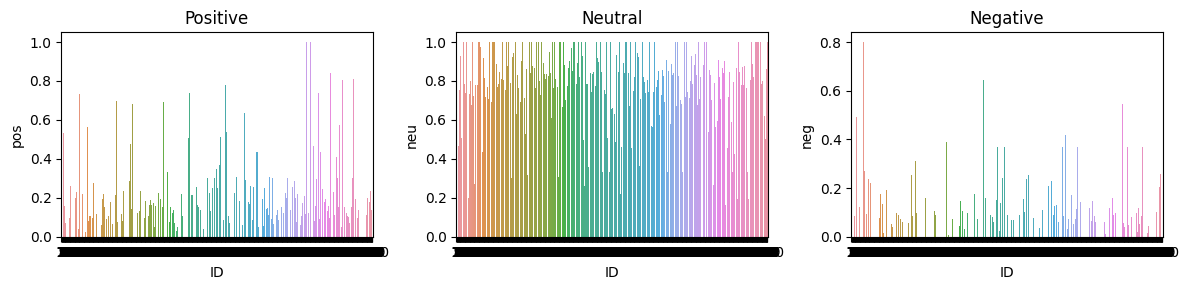

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='ID', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='ID', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='ID', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

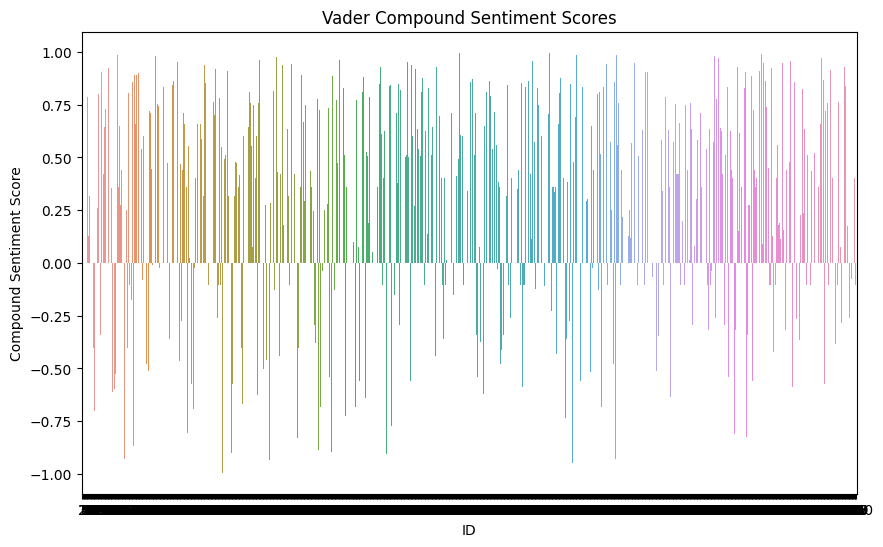

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for compound sentiment scores
plt.figure(figsize=(10, 6))
sns.barplot(x='ID', y='compound', data=vaders)
plt.title('Vader Compound Sentiment Scores')
plt.xlabel('ID')
plt.ylabel('Compound Sentiment Score')
plt.show()


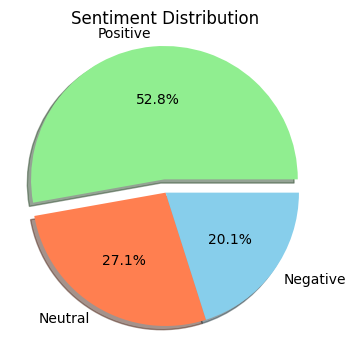

In [ ]:
# Categorize sentiments into Positive, Negative, and Neutral
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

vaders['Sentiment'] = vaders['compound'].apply(categorize_sentiment)

# Create a pie chart
sentiment_counts = vaders['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['lightgreen', 'coral', 'skyblue']
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()
